In [1]:
import pandas
import numpy as np
frame = pandas.read_csv('datos.csv')
frame.describe()
frame.head()


,Unidad,Parametro,A�o,Mes,D�a,Fecha,Valor,Area
0,mg/L,P tot.,2018,5,17,5/17/2018,0.2,AV10
1,mg/L,P tot.,2018,3,2,3/2/2018,0.1,AV10
2,mg/L,P tot.,2018,5,14,5/14/2018,0.2,CA10
3,NMP/100 ml,CF,2018,5,17,5/17/2018,1600.0,CL30
4,NMP/100 ml,CF,2018,5,17,5/17/2018,1600.0,RI10


In [2]:
frame.describe()

,A�o,Mes,D�a,Valor
count,8676.000000,8676.000000,8676.000000,8.676000e+03
mean,2012.681881,6.982826,13.931996,4.214336e+02
std,3.306094,3.555415,9.960139,1.754335e+04
min,2008.000000,1.000000,1.000000,7.000000e-04
25%,2009.000000,3.000000,5.000000,4.000000e-01
50%,2012.000000,6.000000,14.000000,6.600000e+00
75%,2016.000000,11.000000,22.000000,2.327000e+01
max,2018.000000,12.000000,30.000000,1.600000e+06


In [3]:
lista_sectores = list(dict.fromkeys(list(frame['Area'])).keys())
datos = dict()
cantidad_d = dict()
for area in lista_sectores:
    datos[area]=dict()
    cantidad_d[area] = 0
    for indice_fila, fila in frame.iterrows():
        if fila['Area']== area:
            if fila['Parametro'] not in datos[area].keys():
                datos[area][fila['Parametro']]=0
            datos[area][fila['Parametro']]+=1
            cantidad_d[area]+=1

In [4]:
import matplotlib.pyplot as plt
def grafico_comparativo(data_x,data_y,ax,area):    
    ax.bar(data_x,data_y,label = 'Area')
    ax.legend(title = area)
    ax.set_title(area)
    ax.set_xlabel("Parametro")
    ax.set_ylabel("cantidad")
    ax.grid(True)
fig,ax = plt.subplots(21,1,figsize=(20,40))
x=0
for area in datos.keys():
    d_x = datos[area].keys()
    d_y = datos[area].values()
    grafico_comparativo(d_x,d_y,ax[x],area)
    x+=1

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
fig.show()
    

/home/gerson/anaconda3/envs/dataminer/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [5]:
lista_minerales = list(dict.fromkeys(list(frame['Parametro'])).keys())
datos = dict()
for param in lista_minerales:
    datos[param]=dict()
    for indice_fila, fila in frame.iterrows():
        if fila['Parametro']== param:
            if fila['Area'] not in datos[param].keys():
                datos[param][fila['Area']]=0
            datos[param][fila['Area']]+=1

/home/gerson/anaconda3/envs/dataminer/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


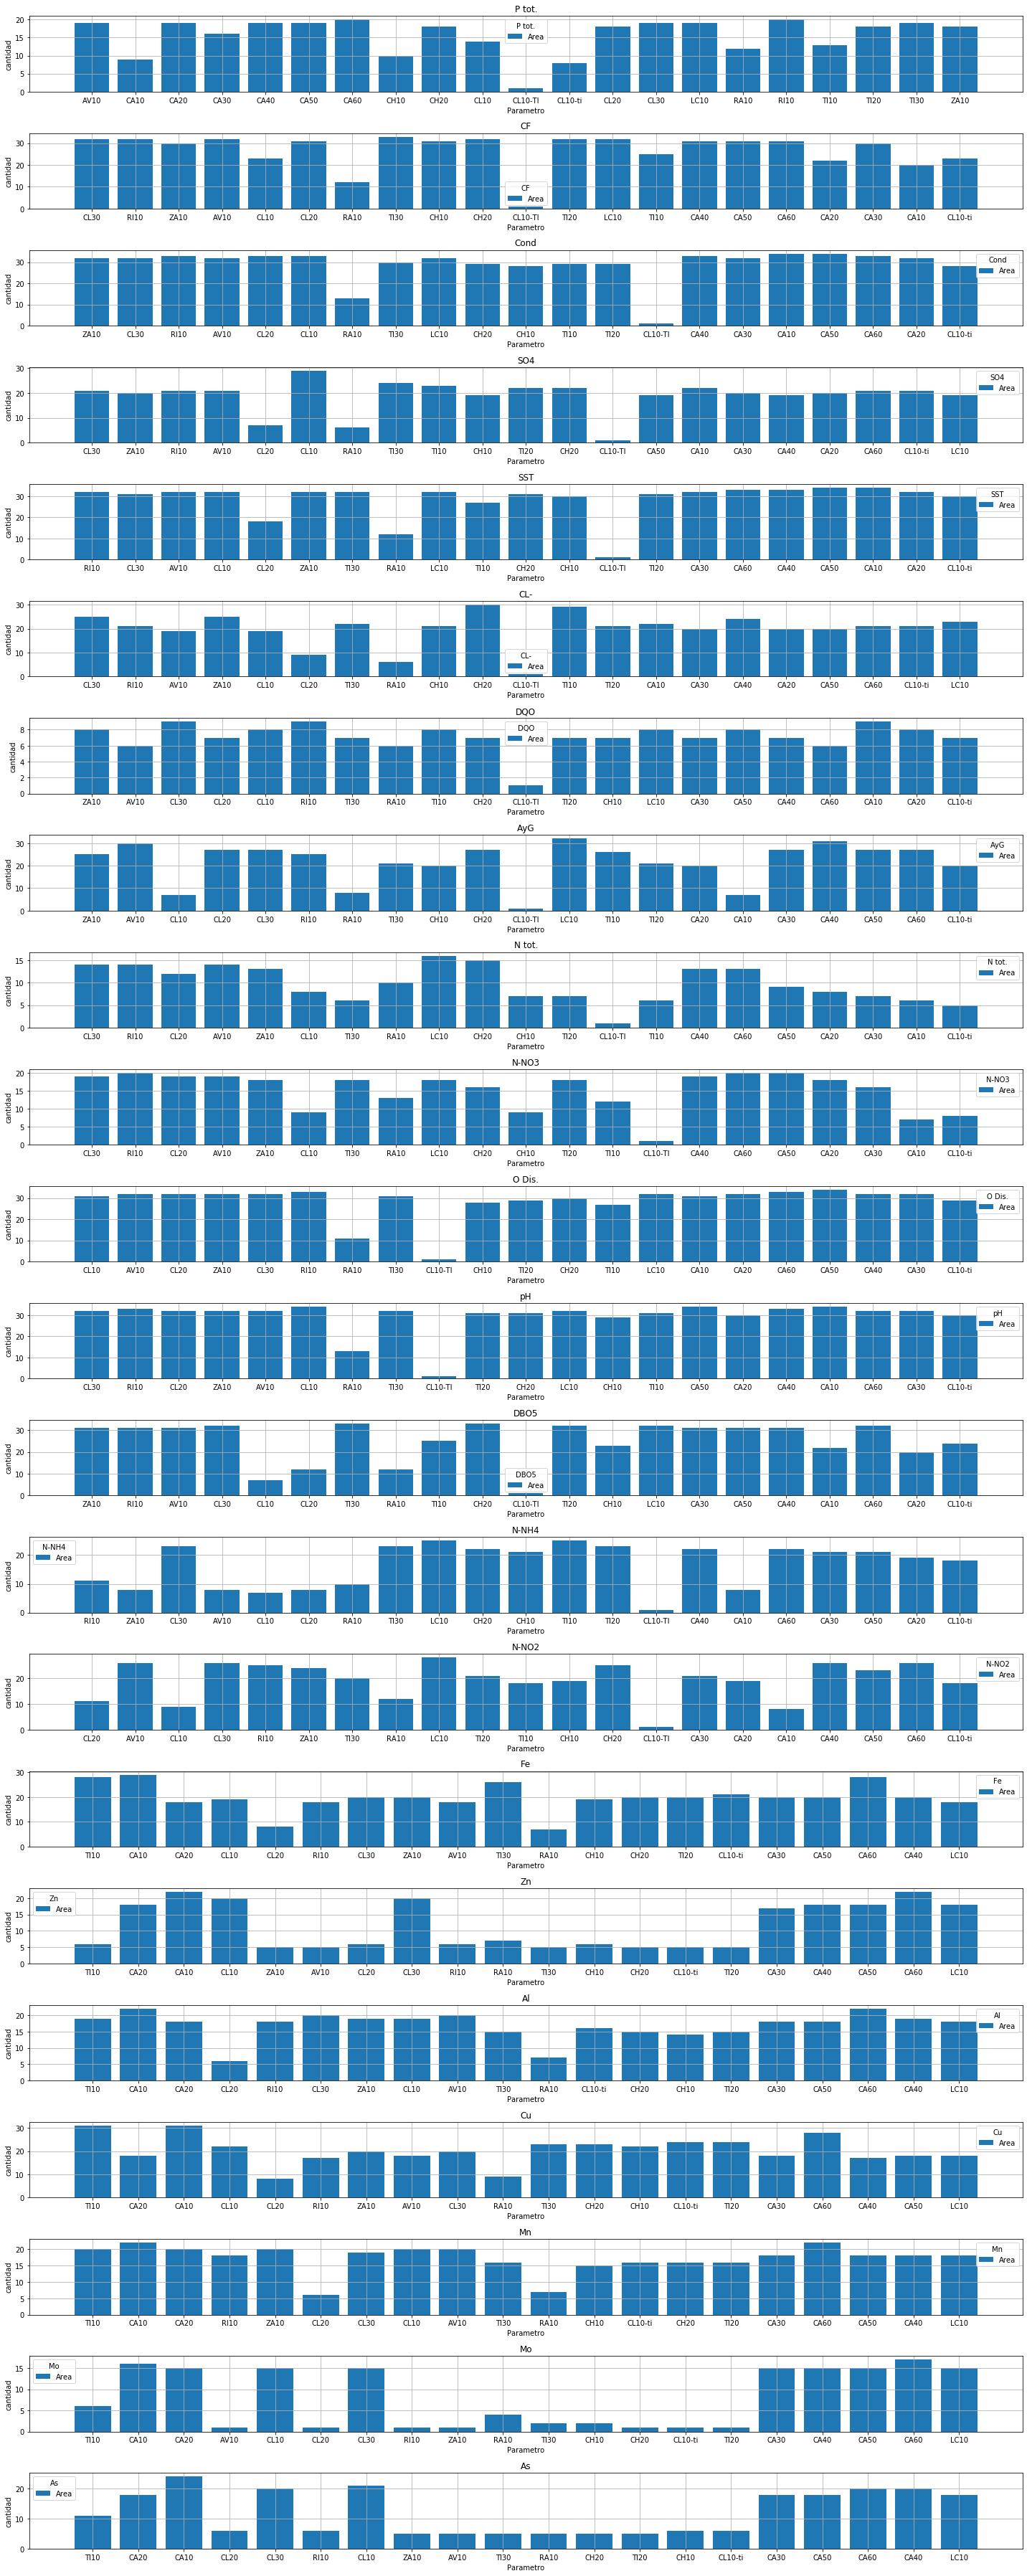

In [6]:
fig,ax = plt.subplots(len(datos.keys()),1,figsize=(20,50))
x=0
for param in datos.keys():
    d_x = datos[param].keys()
    d_y = datos[param].values()
    grafico_comparativo(d_x,d_y,ax[x],param)
    x+=1

#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
fig.show()

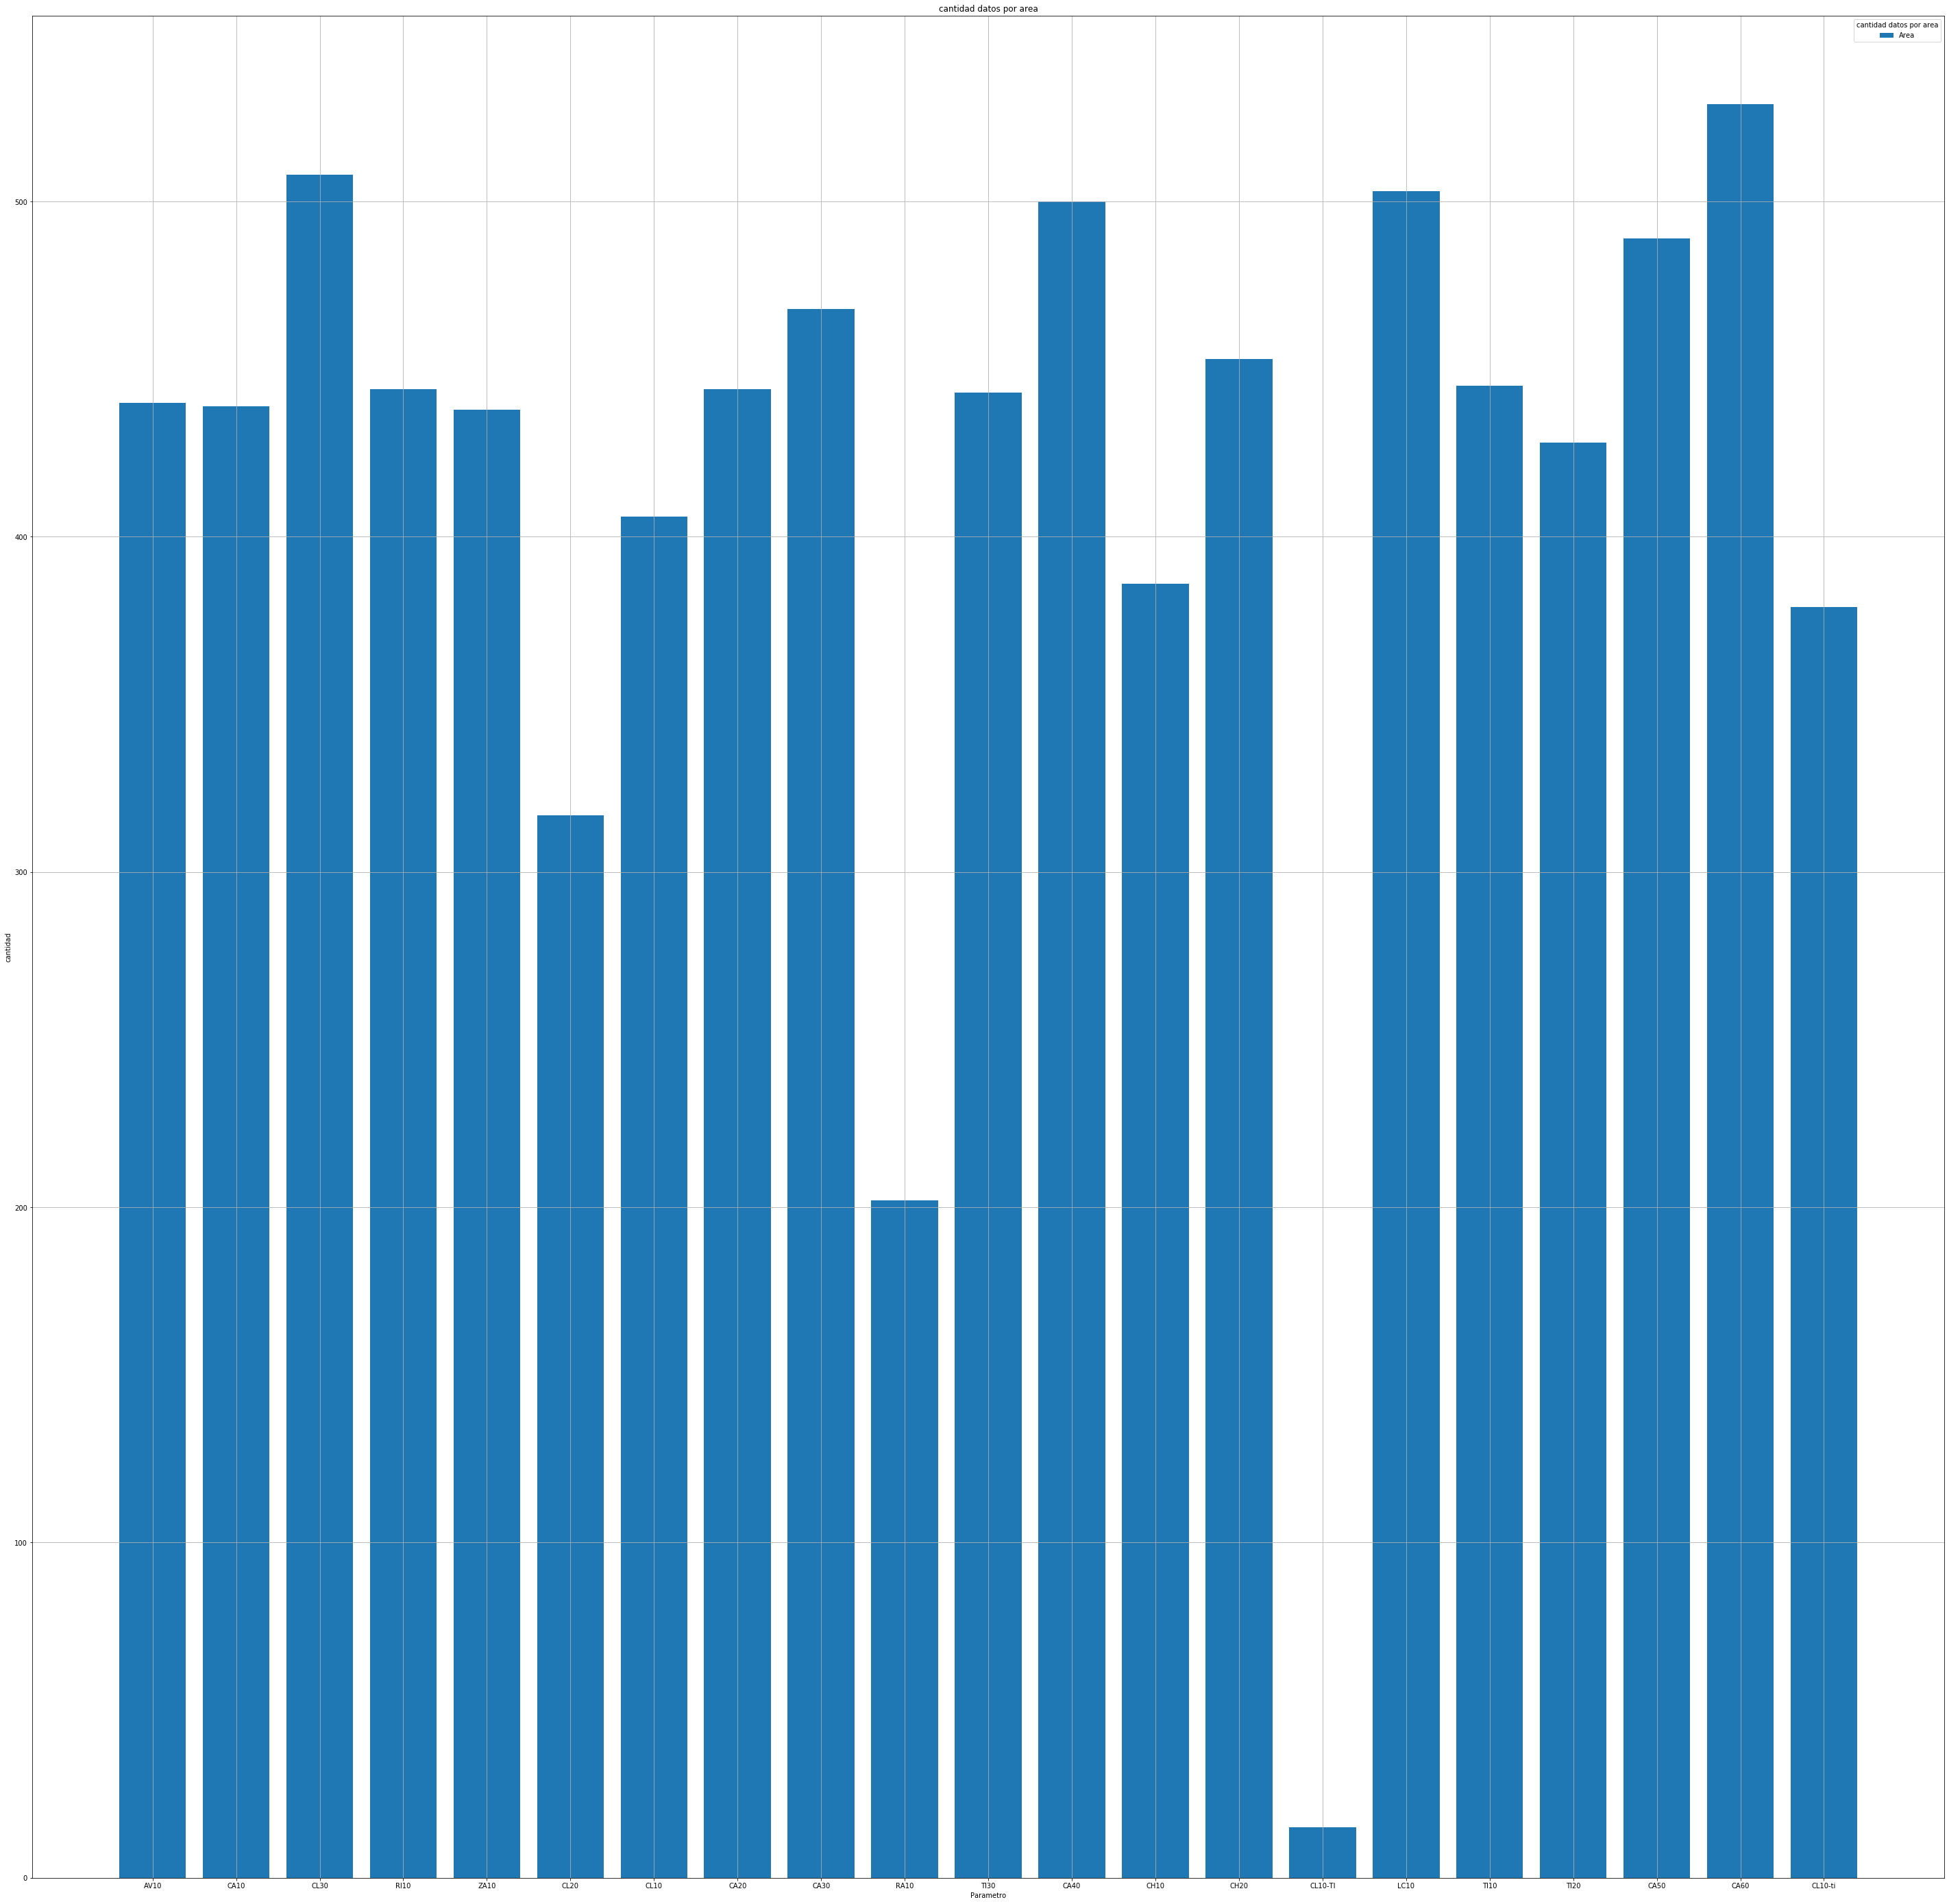

In [7]:
#zonas con mas datos 
fig,ax = plt.subplots(1,1,figsize=(50,50))
grafico_comparativo(cantidad_d.keys(),cantidad_d.values(),ax,"cantidad datos por area")


In [37]:
##zonas sobre la media
promedio = sum(cantidad_d.values())/len(cantidad_d.values())
data = dict()
for u,v in cantidad_d.items():
    if v > promedio:
        data[u]=v
##seleccion primeros 6
mayores = sorted(data.values())[::-1][0:6]
datos_finales = dict()
for i in mayores:
    for u,v in data.items():
        if i == v:
            datos_finales[u]=v
datos_finales

{'CA60': 529, 'CL30': 508, 'LC10': 503, 'CA40': 500, 'CA50': 489, 'CA30': 468}

In [44]:
#zona con mayor cantidad de datos CA60
#Analisis de los datos
n_zone = dict()
for indice_fila, fila in frame.iterrows():
    if fila['Area'] == 'CA60':
        if fila['Parametro'] not in n_zone.keys():
            n_zone[fila['Parametro']]=[]
        n_zone[fila['Parametro']].append((fila['A�o'],fila['Valor']))
n_zone

frame_zonas = frame[(frame['Area'] == list(datos_finales.keys())[0])]
frame_zonas1 = frame[(frame['Area'] == list(datos_finales.keys())[1])]
frame_zonas2 = frame[(frame['Area'] == list(datos_finales.keys())[2])]
frame_zonas3 = frame[(frame['Area'] == list(datos_finales.keys())[3])]
frame_zonas4 = frame[(frame['Area'] == list(datos_finales.keys())[4])]
frame_zonas5 = frame[(frame['Area'] == list(datos_finales.keys())[5])]
frame_final = pandas.concat([frame_zonas,frame_zonas1,frame_zonas2,frame_zonas3,frame_zonas4,frame_zonas5])
##separando frames
ph = frame_final[(frame_final['Parametro']=='pH')]



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig, ax = plt.subplots(figsize=(50,50)) 
sns.pairplot(ph, hue="Area");